In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('D:\ALL MACHINE CASE STUDIES\haberman dataset')

### 1.0 DATA SET INFORMATION

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

- Number of Instances: 306

- Number of Attributes: 4 (including the class attribute)

Attribute Information:

- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year

In [2]:
data = pd.read_csv('haberman.csv',names = ['patients Age', 'year of operation (1900)', 'no_of_auxillary_nodes', 'survival status'])
data.head(5)

,patients Age,year of operation (1900),no_of_auxillary_nodes,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Looking at the info of the dataset :

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patients Age                306 non-null int64
year of operation (1900)    306 non-null int64
no_of_auxillary_nodes       306 non-null int64
survival status             306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [46]:
print('The number of data points : {} '. format(data.shape))
print('Number of patients undergone surgery and lived for more than 5 years : {}'.format(data.loc[data['survival status'] == 1,:].shape[0] ))
print('Number of patients undergone surgery and died within 5 years : {}'.format(data.loc[data['survival status'] == 2,:].shape[0] ))

The number of data points : (306, 4) 
Number of patients undergone surgery and lived for more than 5 years : 225
Number of patients undergone surgery and died within 5 years : 81


### 1.2 Understanding the data :

In [41]:
data.describe()

,patients Age,year of operation (1900),no_of_auxillary_nodes,survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


the percentage of people survived 73.52941176470588 %


([<matplotlib.patches.Wedge at 0x1c161153c88>,
 [Text(-0.7410651721946901, 0.8129098415937984, 'survied more than or equal to 5 years'),
  Text(0.74106517219469, -0.8129098415937984, 'notsurvived for more than 5 years')])

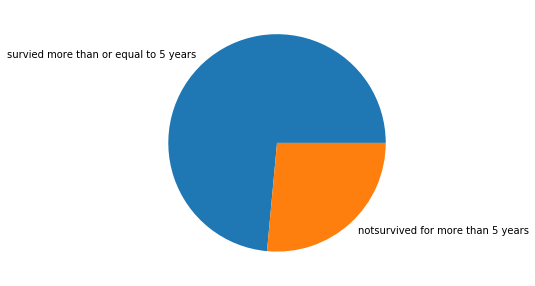

In [26]:
print('the percentage of people survived {} %'.format((data_surv.shape[0]/data.shape[0])*100) )
fig,ax = plt.subplots(figsize = (5,5))
ax.pie([surv, nonsurv], labels = ['survied more than or equal to 5 years', 'notsurvived for more than 5 years'],labeldistance=1.1 )

### 2.0 EXPLORATORY DATA ANALYSIS :

### 2.1 Univariate Analysis:-

#### 1) Patients Age :

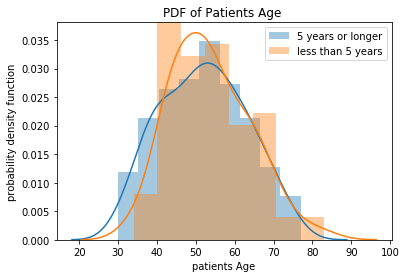

In [61]:
plt.figure()
sns.distplot(data.loc[data['survival status'] == 1, 'patients Age'], label = '5 years or longer' )
sns.distplot(data.loc[data['survival status'] == 2, 'patients Age'] , label =  'less than 5 years' )
plt.ylabel('probability density function')
plt.title('PDF of Patients Age ')
plt.legend()

### Observation:-
- Most of the patients Age is around 50 years
- Most of the distributon is overlapping that tells us that the survival rate is irrespective of the persons age.
- we can still say that the people between te age of 30 and 40 have higher chnaces of survival. 
- survival is less likely between the age of 40 and 60. while people in the age above 60 are equally likely to survive.
- based on this feature we cannot decide whether a patient will survive for > 5 years or not.

### 2) Year of operation :

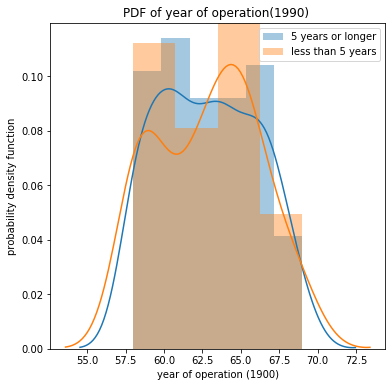

In [66]:
plt.figure(figsize=(6,6))
sns.distplot(data.loc[data['survival status'] == 1, 'year of operation (1900)'], label = '5 years or longer' )
sns.distplot(data.loc[data['survival status'] == 2, 'year of operation (1900)'] , label =  'less than 5 years' )
plt.ylabel('probability density function')
plt.title('PDF of year of operation(1990) ')
plt.legend()

### Observation:-

- Most of the distribution is overlapping hence cannot be a deciding factor on whether a patient will survive for more than 5 years or not.

- we can see that the patients operated in the year between 58 and 59,  65 and 66 have less chances of survival.

### 3) No of Nodes:

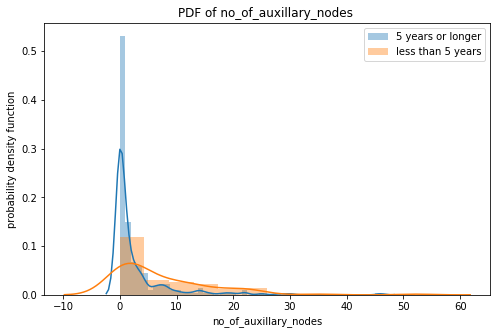

In [70]:
plt.figure(figsize=(8,5))
sns.distplot(data.loc[data['survival status'] == 1, 'no_of_auxillary_nodes'], label = '5 years or longer' )
sns.distplot(data.loc[data['survival status'] == 2, 'no_of_auxillary_nodes'] , label =  'less than 5 years' )
plt.ylabel('probability density function')
plt.title('PDF of no_of_auxillary_nodes ')
plt.legend()

### Observation:


- It can be clearly observed that more the nodes less the survival chancess for the patients.
- more number of people with 0 or very few nodes have larger chances of survival.
- patients with more than 20 nodes are less likely to survive

### 3.0 BOX PLOTS AND VIOLIN PLOTS (nodes) 

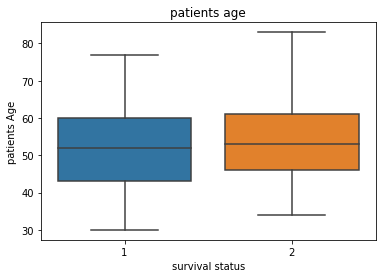

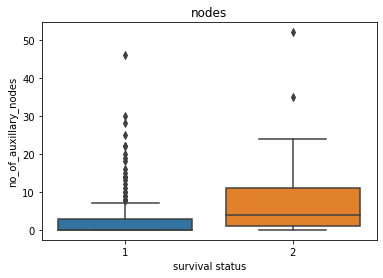

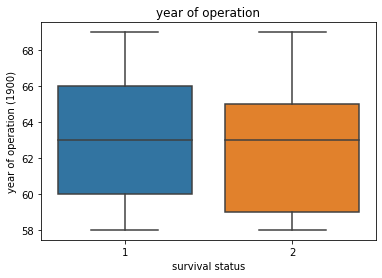

In [3]:
data_surv = data.loc[data['survival status'] == 1]
data_notsurv = data.loc[data['survival status'] == 2]

sns.boxplot(x = 'survival status', y = 'patients Age', data= data)
plt.title('patients age')
plt.show()

sns.boxplot(x = 'survival status', y = 'no_of_auxillary_nodes', data= data)
plt.title('nodes')
plt.show()

sns.boxplot(x = 'survival status', y = 'year of operation (1900)', data= data)
plt.title('year of operation')
plt.show()

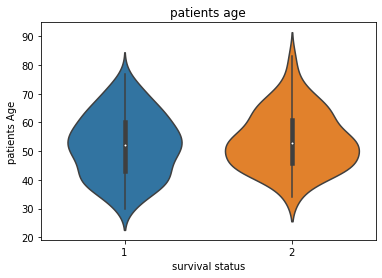

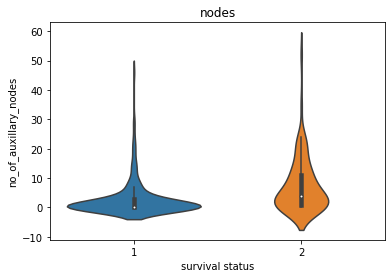

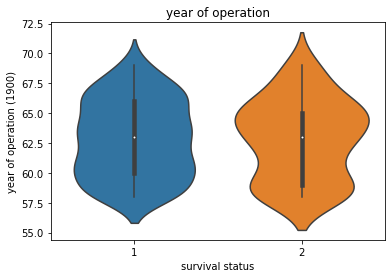

In [78]:
sns.violinplot(x = 'survival status', y = 'patients Age', data= data)
plt.title('patients age')
plt.show()

sns.violinplot(x = 'survival status', y = 'no_of_auxillary_nodes', data= data)
plt.title('nodes')
plt.show()

sns.violinplot(x = 'survival status', y = 'year of operation (1900)', data= data)
plt.title('year of operation')
plt.show()

### Observation:

- A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.

- More number of people did not survive in the year 1965 comparetively to people who survived.

- patients with more than one node have lesser chances of survival.

- There is less overlap in axillary nodes plot compared to other plots but still the overlapp eists hence cannot set a threshold to classify 2 classes.

In [27]:
surv = data_surv.shape[0]
nonsurv = data_notsurv.shape[0]
data

,patients Age,year of operation (1900),no_of_auxillary_nodes,survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### 4.0 Bi Variate Analysis:

### 4.1 Scatter Plot:

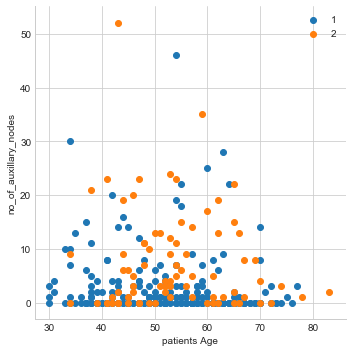

In [34]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
x = sns.FacetGrid(data, hue = 'survival status', size = 5)
x = x.map(plt.scatter, 'patients Age', 'no_of_auxillary_nodes')
plt.legend()
plt.show()

### Observation:-

- people with 0 nodes have more survival chances 
- Most of the people have nodes between 0 and 20. There are very few people with nodes greater than 30.
- people with age more than 50 and nodes between 10 and 20 are very less likely to survive.

No handles with labels found to put in legend.


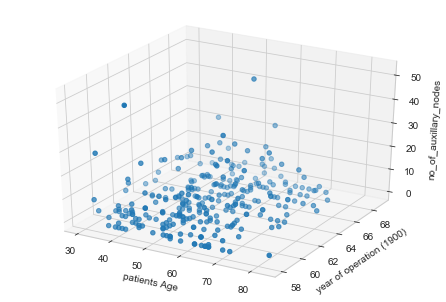

In [38]:
# 3d scatter plot using 3 dimensions without colors

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig)

x = data['patients Age']
y = data['year of operation (1900)']
z = data['no_of_auxillary_nodes']

ax.scatter(x,y,z)
ax.set_xlabel('patients Age')
ax.set_ylabel('year of operation (1900)')
ax.set_zlabel('no_of_auxillary_nodes')
plt.legend()

plt.show()

### 4.2 Pair Plot

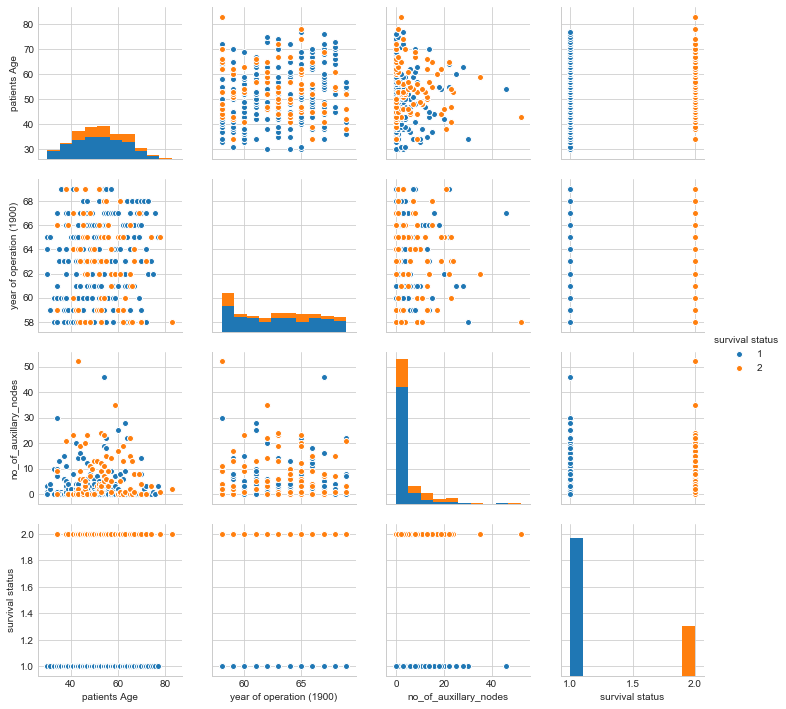

In [49]:
sns.set_style('whitegrid')
sns.pairplot(data, hue='survival status',)
plt.show()

### Observation:


- only nodes graph show that people with slightly more number of nodes have less chances of survival.

## Conclusion:


- Based on the given features it is difficult to classify the 2 classes as the data is imbalanced
- only the nodes feature is somewhat informative in understanding the difference in the survival chances of a patients.
- Age is not the deciding factor.